In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [251]:
data = pd.read_csv("Student_List_A2.csv")

In [252]:
data.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1


Task A:

1)

Columns:

StudentID, Age, StudyTimeWeekly, Absences, ParentalSupport, GPA, GradeClass

2) Changing GradeClass

In [253]:
gradeMap = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
data["GradeClass"] = data["GradeClass"].map(gradeMap)

In [254]:
data.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


3) There are missing values in the StudyTimeWeekly column. To fix them, i replace NA data with the mean of the column

In [255]:
print(data[data.isnull().any(axis=1)]["StudentID"])

19      1021
23      1025
105     1107
126     1128
260     1262
388     1390
444     1446
492     1494
558     1560
599     1601
767     1769
965     1967
993     1995
1051    2053
1247    2249
1307    2309
1479    2481
1672    2674
1753    2755
1934    2936
2044    3276
Name: StudentID, dtype: int64


In [256]:
data["StudyTimeWeekly"] = data["StudyTimeWeekly"].fillna(data["StudyTimeWeekly"].median())

4)  Student 1114 is an outlier for absences, and student 2003 has a faulty value, which is negative, so I remove these rows

In [257]:
data = data[data["StudentID"] != 1114]
data = data[data["StudentID"] != 2003]

5)  Some of the GradeClass values do not match the formula given for their GPA. We can fix this by remaking the GradeClass column

In [258]:
data = data.drop("GradeClass", axis=1)

In [259]:
def expGradeClass(gpa):
    if 3.5 <= gpa :
        return 'A'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.5 <= gpa < 3.0:
        return 'C'
    elif 2.0 <= gpa < 2.5:
        return 'D'
    else:
        return 'F'

In [260]:
data['GradeClass'] = data['GPA'].apply(expGradeClass)

Task A2:

1)  

Supervised Machine Learning is the the process of using labeled data to train an algorithm to predict an outcome and/or recognise patterns.

Labelled data is data that has been labeled with a designated outcome. For example, pictures of different objects can be labeled with the name of the object, and then used in Supervised Machine Learning to create an algorithm to identify objects in photos.

Train datasets are used in supervised machine learning to train an algorithm, and test datasets are used to test said algorithm. It is important to have a distinction between these datasets, to ensure that the algorithm is trained to learn patterns, rather than "memorise the answers" in a single dataset.

2) Wrangling the data for preprocessing

In [261]:
dataX = data.drop("GPA", axis=1)
dataX = dataX.drop("StudentID", axis=1)
dataX = dataX.drop("GradeClass", axis=1)

dataY = data["GradeClass"]

3) Seperating inputs and outputs, and making the data into test and train datasets

In [262]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.2)

Task A3:

1)

Normalisation is used when the different attributes in a dataset do not have a consistent scale. Normalisation makes the scales consistent with eachother, allowing many objective functions to work properly, so that one attribute will not have a much greater impact than another in the machine learning algorithm.

I will be using StandardScaler from sklearn.preprocessing to scale the data

In [263]:
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

2)

A support vector machine (svm) maps data onto a multi dimensional space, and draws planes to best seperate data points into their respective labels, while maximising the distance between the planes and the data points. To make a prediction, new data is mapped onto the space, and the section that it falls into defines the predicted outcome.

The kernel is the algorithm used to map data onto a multi dimensional space. It allows the SVM to function without directly working in higher dimensional space, which would be incredibly computationally expensive.

In [264]:
svm = SVC()

In [265]:
svm.fit(trainX, trainY)

SVC()

3) XGBoost

In [266]:
gradeEncoder = LabelEncoder()

boostTrainY = gradeEncoder.fit_transform(trainY)
boostTestY = gradeEncoder.fit_transform(testY)

In [267]:
xgBoost = XGBClassifier(eval_metric='mlogloss')

In [268]:
xgBoost.fit(trainX, boostTrainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Task A4:

1 and 2. 

predictions, confusion matrices and accuracy

    SVM:



In [269]:
predY = svm.predict(testX)
confusionMatrix = confusion_matrix(testY, predY)
print(confusionMatrix)
accuracy = accuracy_score(testY, predY)
print(accuracy)

[[  0   7   1   0   0]
 [  0  25  13   0   0]
 [  0   9  33  14   0]
 [  0   0  15  42  16]
 [  0   0   1  12 232]]
0.7904761904761904


    XGBoost:

In [270]:
boostPredY = xgBoost.predict(testX)
boostConfusionMatrix = confusion_matrix(boostTestY, boostPredY)
print(boostConfusionMatrix)
boostAccuracy = accuracy_score(boostTestY, boostPredY)
print(boostAccuracy)

[[  2   6   0   0   0]
 [  9  15  14   0   0]
 [  0  16  24  16   0]
 [  0   1  15  46  11]
 [  0   0   1  16 228]]
0.75


3)

Both classifiers performed very similarly. However, improvements can be made to both by tuning parameters. It is difficult to say which one is better when the accuracy is so similar.

Task A5:

    Using XGBoost

In [271]:
compData = pd.read_csv("Student_List_A2_Submission.csv")

In [272]:
compPredX = sc.transform(compData.drop("StudentID", axis=1))

In [273]:
dataY = gradeEncoder.fit_transform(dataY)

In [274]:
compPredY = xgBoost.predict(compPredX)

In [275]:
len(compPredY)

161

In [276]:
submissionData = pd.DataFrame({"StudentID": compData["StudentID"], "GradeClass": compPredY})

In [277]:
submissionData.head()

,StudentID,GradeClass
0,5000,4
1,5001,2
2,5002,3
3,5003,4
4,5004,2


In [278]:
#convert the grade back to the original format
submissionData["GradeClass"] = submissionData["GradeClass"].map(gradeMap)

In [279]:
submissionData.head()

,StudentID,GradeClass
0,5000,F
1,5001,C
2,5002,D
3,5003,F
4,5004,C


In [280]:
submissionData.to_csv("submission.csv", index=False)

Task B1:

1)

Healthcare Stroke Data:
https://www.kaggle.com/datasets/mohamedmansourabbas/healthcare-stroke-data?resource=download





2)

I will be using the attributes bmi and avg_glucose_level. bmi has some missing values, so i will substitute the median value into these missing values.To wrangle the data, I will remove all other columns, and substitue the median of the columns for missing values in the bmi column.

In [281]:
strokeData = pd.read_csv("healthcare-dataset-stroke-data (Project 4).csv")

In [282]:
strokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [283]:
strokeData = strokeData.drop(columns=["id", "gender", "hypertension", "age", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status",])

In [284]:
strokeData.head()

,avg_glucose_level,bmi,stroke
0,228.69,36.6,1
1,202.21,NaN,1
2,105.92,32.5,1
3,171.23,34.4,1
4,174.12,24.0,1


In [285]:
strokeData["bmi"] = strokeData["bmi"].fillna(strokeData["bmi"].median())

In [286]:
strokeData.head()

,avg_glucose_level,bmi,stroke
0,228.69,36.6,1
1,202.21,28.1,1
2,105.92,32.5,1
3,171.23,34.4,1
4,174.12,24.0,1


3) 
K means Clustering

In [287]:
kmeans = KMeans(n_clusters=2).fit(
    strokeData[['bmi','avg_glucose_level']])

4)
    
    Data Visualisation

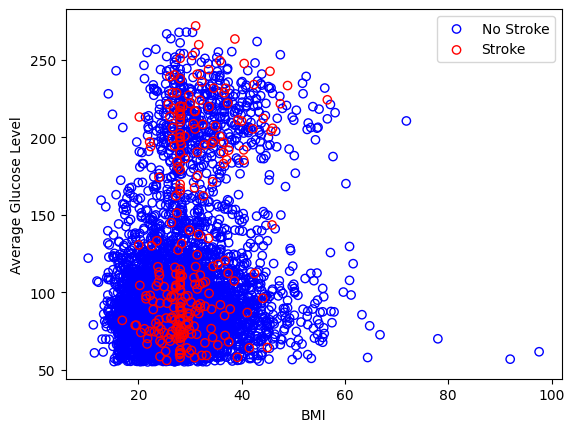

In [288]:
plt.scatter(strokeData[strokeData["stroke"] == 0]["bmi"], 
            strokeData[strokeData["stroke"] == 0]["avg_glucose_level"], 
            marker='o', facecolors='none', edgecolors='b', label='No Stroke')

plt.scatter(strokeData[strokeData["stroke"] == 1]["bmi"], 
            strokeData[strokeData["stroke"] == 1]["avg_glucose_level"], 
            marker='o', facecolors='none', edgecolors='r', label='Stroke')

plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.legend()
plt.show()

    K means Clustring Visualisation

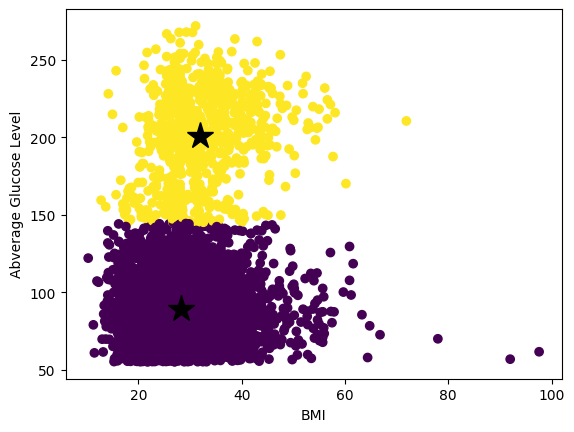

In [291]:
plt.scatter(
 x=strokeData['bmi'],
 y=strokeData['avg_glucose_level'],
 c=kmeans.labels_)

plt.plot(
 kmeans.cluster_centers_[:,0],
 kmeans.cluster_centers_[:,1],
 'k*',
 markersize=20
)

plt.xlabel('BMI')
plt.ylabel('Abverage Glucose Level')
plt.show()

When looking at the data in the context of BMI and average glucose levels, there are 2 main clusters that you can see by eye. When employing k means clustering, these same 2 groups can also be identified. Additionally, the clusters seem to be differentiated by average glucose level, as there is a clear line just below the 150 mark. When looking through the lens of identifying stroke patients, There is no discernable link between these 2 groups and the occurance of a stroke in a patient.